FFR 120  
Felix Waldschock

HW 3 
Exercise 12.1
## The Erdos-Renyi random graph

In [260]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange
import math


Model is binary, so entries in A are either $[0,1]$

In [261]:
# parameters
n = 100                  # number of nodes

# p is probability between 2 nodes
p = 0.05

In [262]:
# init the Adjacent matrix
A = np.zeros((n,n))         # dimensions i and j

# for j > i change entry to 1 with probability p
for i in range(n):
    for j in range(n):
        if(j>i):
            if np.random.rand() < p:
                A[i,j] = 1
                A[j,i] = 1

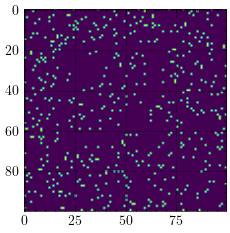

In [263]:
plt.imshow(A)

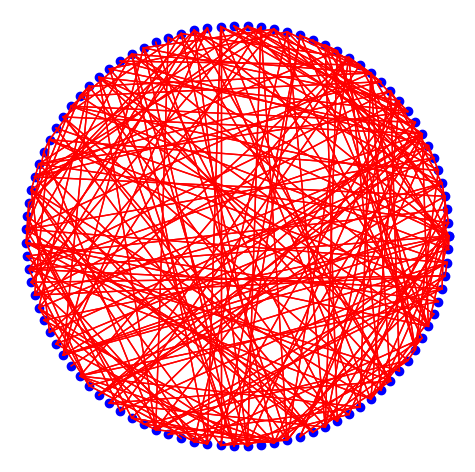

In [264]:
# plot a circle where the n nodes lay on, and draw the connections between the nodes according to the Adjacent matrix A
def plot_ErdosRenyi(A):
    n = A.shape[0]
    dAngle = 2*np.pi/n
    r = 1
    x = r*np.cos(np.linspace(0,2*np.pi,n))
    y = r*np.sin(np.linspace(0,2*np.pi,n))
    plt.figure(figsize=(6,6))
    plt.axis('off')
    plt.plot(x,y,'o',color='blue')
    for i in range(n):
        for j in range(n):
            if A[i,j] == 1:
                plt.plot([x[i],x[j]],[y[i],y[j]],color='red')
    plt.show()


plot_ErdosRenyi(A)

In [265]:
def getDegree(A):
    # get the sum over one axis, e.g the columns
    return np.sum(A,axis=0)

In [269]:
def probabilityDegree(ks, n, p):
    r = np.zeros(len(ks))
    for k in ks:
        tmp1 = (np.math.comb(n-1,k))
        tmp2 = ((p**k) *((1-p)**(n-1-k)))
        r[k] = tmp1 * tmp2
    return  r

maxK = np.max(getDegree(A))
k = np.arange(0,int(maxK))
pk = probabilityDegree(k,n,p)
plt.plot(k,pk,'o',color='blue')
plt.title('Degree distribution')
# plot the data
plt.hist(getDegree(A)/np.sum(getDegree(A)),color='blue')
plt.xlabel('k')
plt.ylabel('p(k)')
plt.show()


TypeError: only integer scalar arrays can be converted to a scalar index

(array([0.04166667, 0.05833333, 0.10833333, 0.13333333, 0.18333333,
        0.23333333, 0.04166667, 0.01666667, 0.        , 0.01666667]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

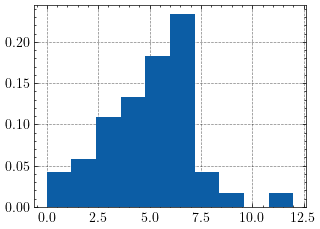

In [267]:
plt.hist(getDegree(A),bins=10, density=True)

7.1 c)

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 921.02it/s]


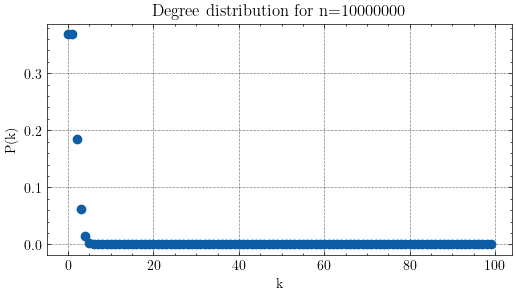

In [268]:
n = np.array([10000])
p = 0.0001
k = np.arange(0,100)
R = np.zeros((len(n),len(k)))
for i in trange(len(n)):
    R[i,:] = probabilityDegree(k,int(n[i]),p)

plt.figure(figsize=(6,3))
plt.plot(k,R[0,:],'o')
plt.title('Degree distribution for n=10000000')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.show()